# Company_Data.csv

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [46]:
company = pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [47]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [48]:
company["Sales"] = pd.cut(company["Sales"], bins =[0,8,17],labels = ["Risky","Good"] )

In [49]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Good,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Good,111,48,16,260,83,Good,65,10,Yes,Yes
2,Good,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Risky,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Risky,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Good,138,108,17,203,128,Good,33,14,Yes,Yes
396,Risky,139,23,3,37,120,Medium,55,11,No,Yes
397,Risky,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Risky,100,79,7,284,95,Bad,50,12,Yes,Yes


In [50]:
label_encoder = preprocessing.LabelEncoder()
company['Sales']= label_encoder.fit_transform(company['Sales']) 
company['US']= label_encoder.fit_transform(company['US'])
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])

In [51]:
x=company.iloc[:,1:9]
y=company['Sales']

In [52]:
company['Sales'].unique()

array([0, 1, 2])

In [53]:
company.Sales.value_counts()

1    235
0    164
2      1
Name: Sales, dtype: int64

In [54]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [55]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [56]:
#decision tree

In [57]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

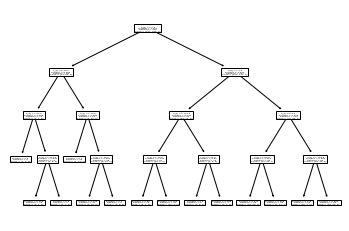

In [58]:
tree.plot_tree(model);

In [59]:
text = tree.export_text(model,max_depth=3)  
print(text)

|--- feature_5 <= 0.50
|   |--- feature_4 <= 93.00
|   |   |--- feature_1 <= 57.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  57.00
|   |   |   |--- feature_1 <= 115.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  115.00
|   |   |   |   |--- class: 1
|   |--- feature_4 >  93.00
|   |   |--- feature_1 <= 70.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  70.50
|   |   |   |--- feature_2 <= 15.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  15.50
|   |   |   |   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_4 <= 135.00
|   |   |   |--- feature_1 <= 40.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  40.50
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  135.00
|   |   |   |--- feature_1 <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  62.50
|   |   |   |   |--- class: 0
|   |--- feature_5 >  1.50
|   |   |--- feature_2 <= 6.50
|   |   |   |--- feature_6 <= 63.50
|

In [60]:
model.feature_importances_ 

array([0.        , 0.18627905, 0.14440831, 0.        , 0.28850788,
       0.32448803, 0.05631673, 0.        ])

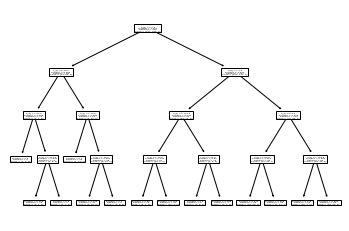

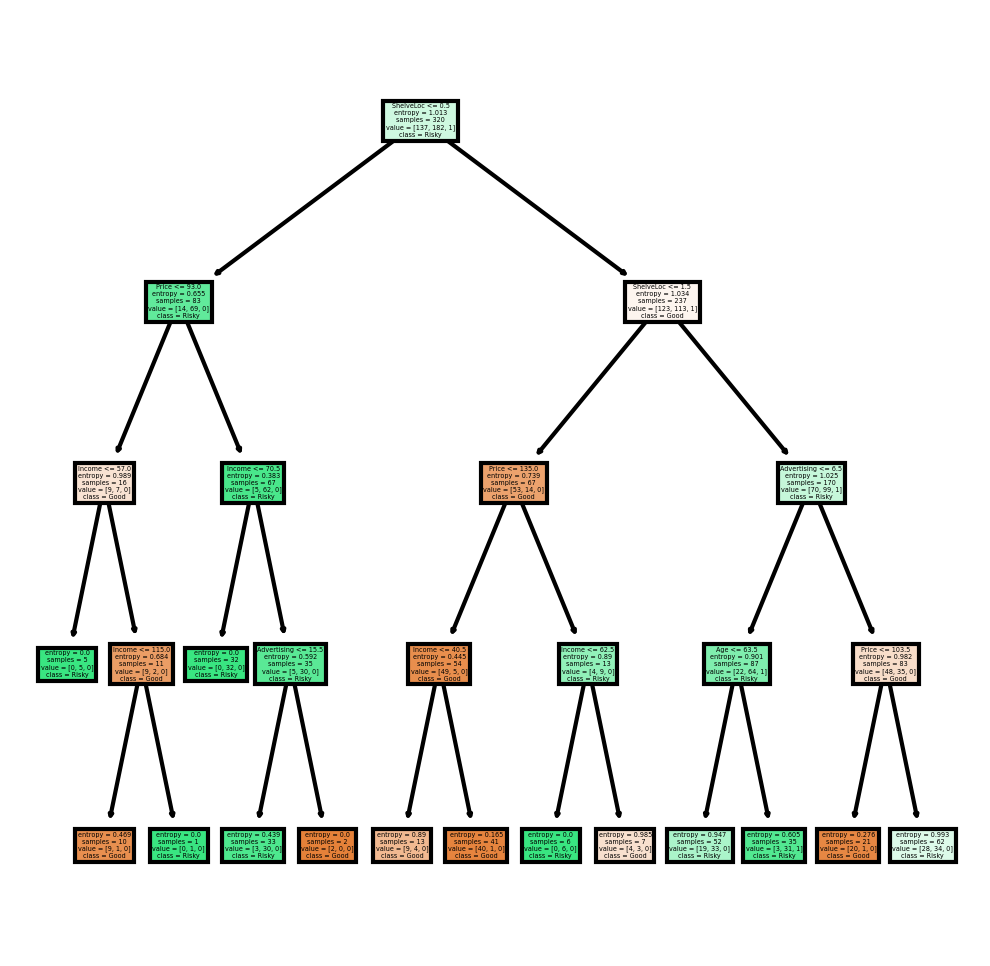

In [61]:
tree.plot_tree(model);
fn=[
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [62]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    58
0    22
dtype: int64

In [63]:
preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,15,12
1,7,46


In [65]:
np.mean(preds==y_test)

0.7625

In [66]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [67]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [68]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [69]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7625

In [70]:
model.feature_importances_ 

array([0.        , 0.18627905, 0.14440831, 0.        , 0.28850788,
       0.32448803, 0.05631673, 0.        ])

In [71]:
#Decision Tree Regression Example

In [72]:
from sklearn.tree import DecisionTreeRegressor 

In [73]:
x=company.iloc[:,1:9]
y=company['Sales']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)   

In [75]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)  

DecisionTreeRegressor(max_depth=3)

In [76]:
model.score(X_test,y_test)

-0.026167503026201633

In [77]:
model.score(X_train, y_train)  

0.36642293512590884

# Fraud_check.csv

In [78]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [79]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [80]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [81]:
colnames = list(df.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc']

In [82]:
#Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


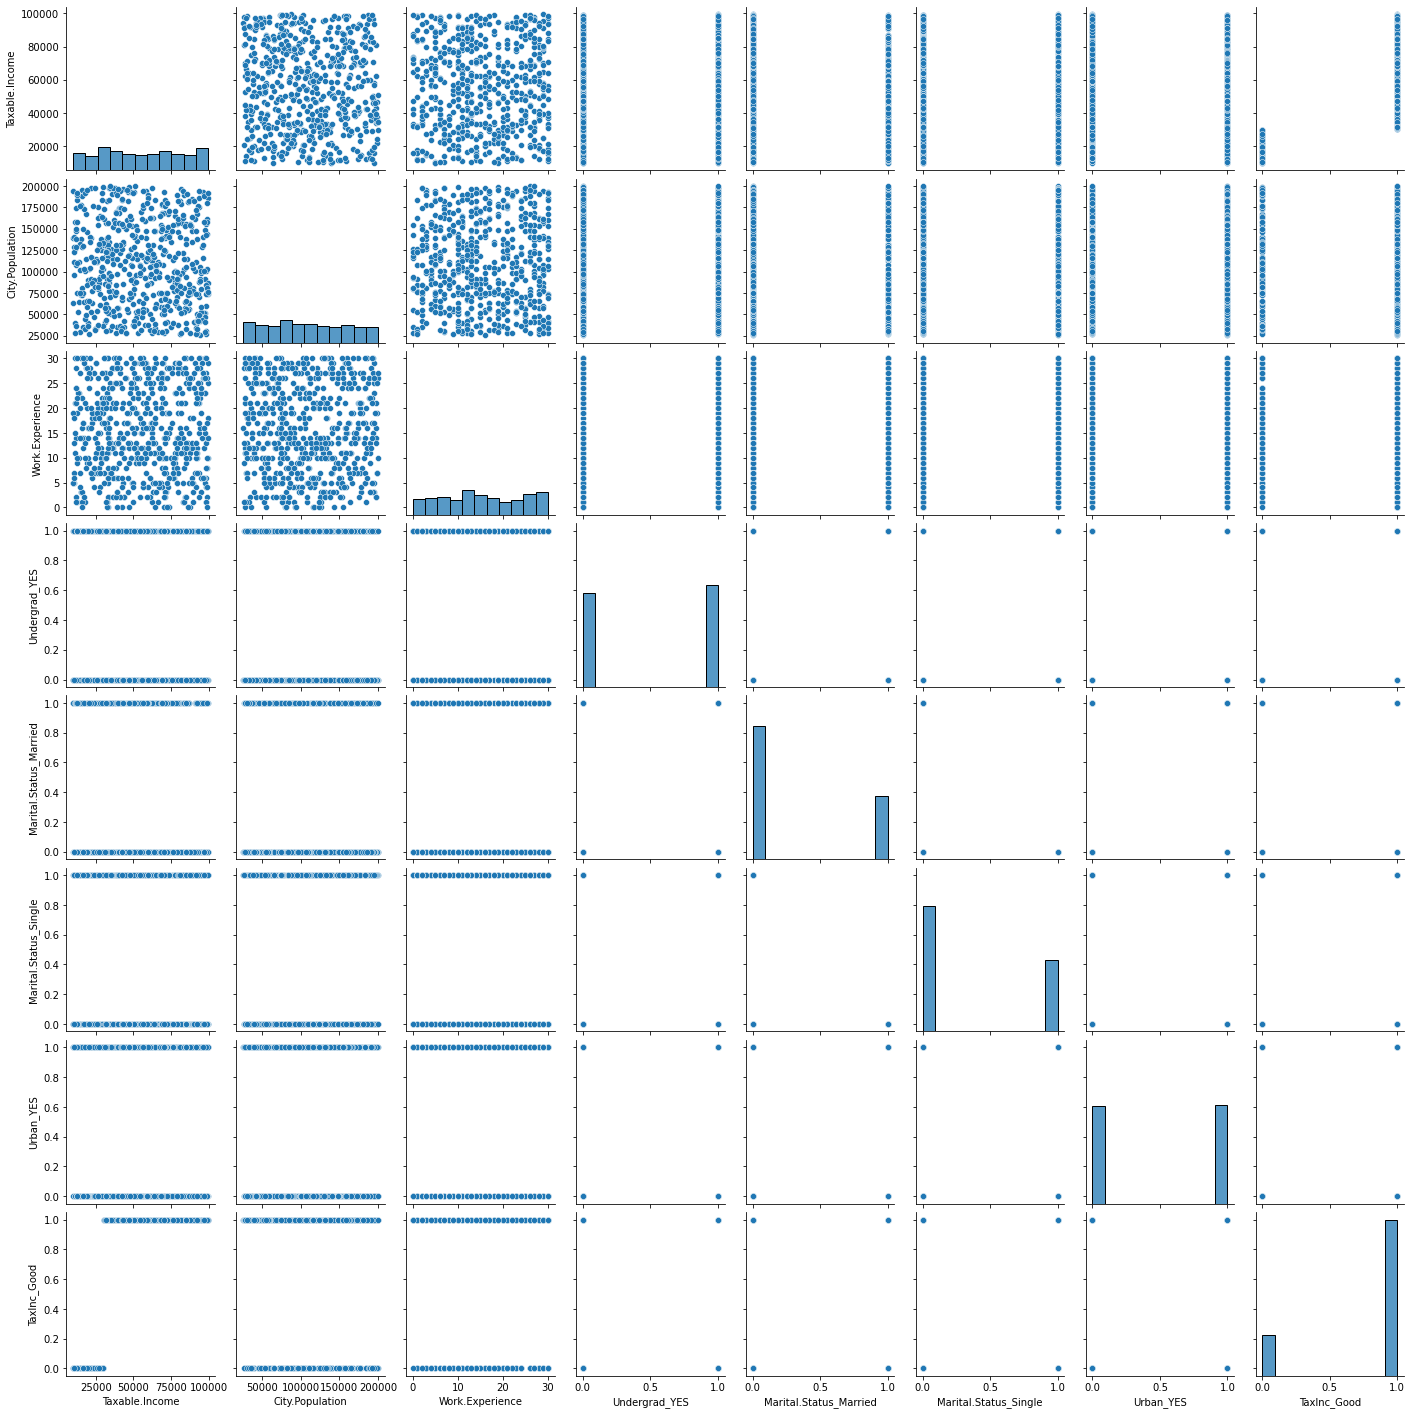

In [83]:
import seaborn as sns
sns.pairplot(data=df)

In [84]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [85]:
# Declaring features & target
x = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

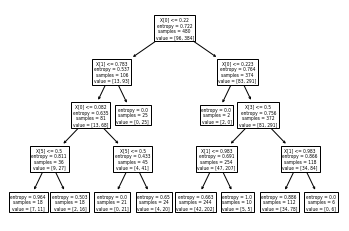

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)
tree.plot_tree(model);

In [87]:
text = tree.export_text(model,max_depth=3)  
print(text)

|--- feature_0 <= 0.22
|   |--- feature_1 <= 0.78
|   |   |--- feature_0 <= 0.08
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.08
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 1.0
|   |--- feature_1 >  0.78
|   |   |--- class: 1.0
|--- feature_0 >  0.22
|   |--- feature_0 <= 0.22
|   |   |--- class: 0.0
|   |--- feature_0 >  0.22
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_1 <= 0.98
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  0.98
|   |   |   |   |--- class: 0.0
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_1 <= 0.98
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  0.98
|   |   |   |   |--- class: 1.0



In [88]:
model.feature_importances_ 

array([0.33177854, 0.36591492, 0.        , 0.10423498, 0.        ,
       0.19807156])

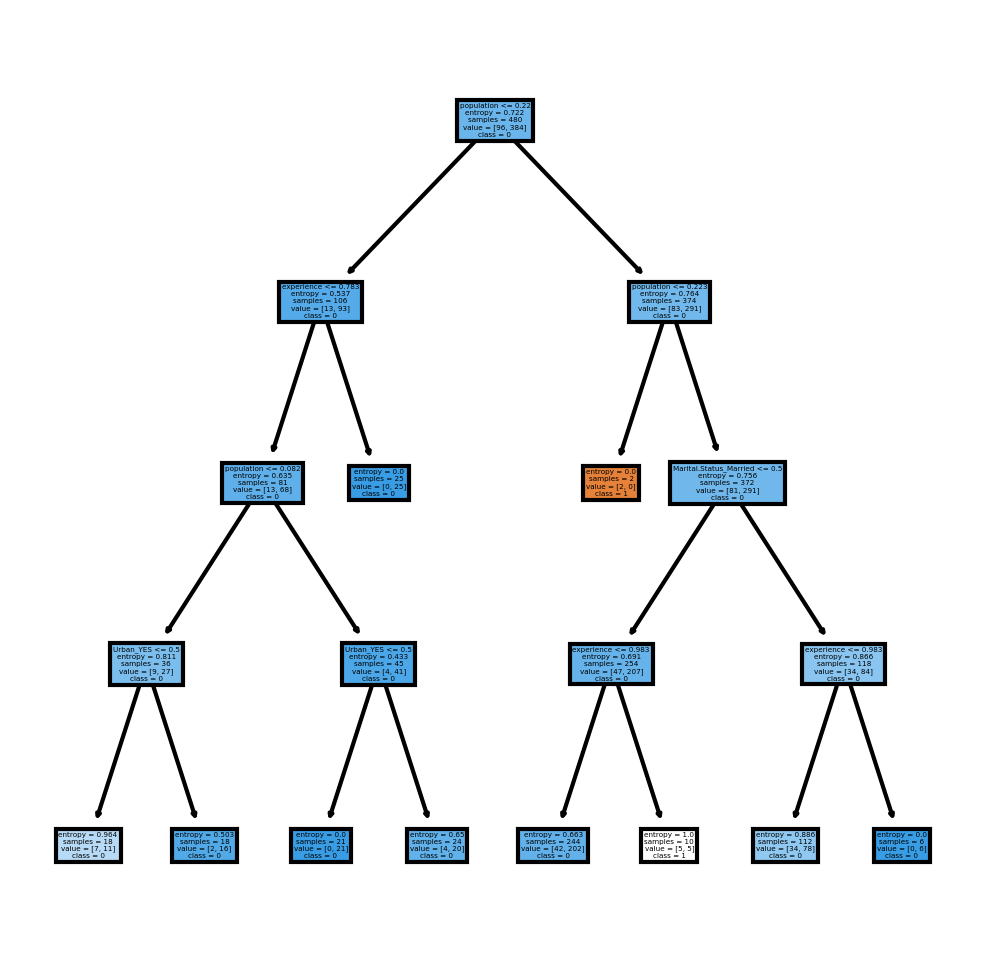

In [89]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [90]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1.0    118
0.0      2
dtype: int64

In [91]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [92]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
TaxInc_Good,,
0.0,1,27
1.0,1,91


In [93]:
np.mean(preds==y_test)

0.7666666666666667

In [94]:
#Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [95]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [96]:
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7666666666666667

In [97]:
model.feature_importances_ 

array([0.33177854, 0.36591492, 0.        , 0.10423498, 0.        ,
       0.19807156])

In [98]:
from sklearn.tree import DecisionTreeRegressor 
x = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)   
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [100]:
model.score(X_test,y_test)

-0.05157374081501098

In [101]:
model.score(X_train, y_train)  

0.058030713439238935